<a href="https://colab.research.google.com/github/JJAYAKUMAR21/twitter-scraping/blob/main/twitter_scraping_using_snscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [ ]:
# customize form
with st.form(key='Twitter_form'):
    text = st.text_input('What do you want to search for?')
    limit = st.slider('How many tweets do you want to get?', 0, 500, step=20)
    output_csv = st.radio('Save a CSV file?', ['Yes', 'No'])
    file_name = st.text_input('Name the CSV file:')
    submit_button = st.form_submit_button(label='Search')

In [ ]:
text = input('Enter query text to be matched (or leave it blank by pressing enter)')
username = input('Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): ')
since = input('Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
until = input('Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
count = int(input('Enter max number of tweets or enter -1 to retrieve all possible tweets: '))
retweet = input('Exclude Retweets? (y/n): ')
replies = input('Exclude Replies? (y/n): ')

Enter query text to be matched (or leave it blank by pressing enter)
Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): actorvijay
Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): 2015-01-01
Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): 
Enter max number of tweets or enter -1 to retrieve all possible tweets: -1
Exclude Retweets? (y/n): y
Exclude Replies? (y/n): y


In [ ]:
def search(text,username,since,until,retweet,replies):
    global filename
    q = text
    if username!='':
        q += f" from:{username}"    
    if until=='':
        until = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    q += f" until:{until}"
    if since=='':
        since = datetime.datetime.strftime(datetime.datetime.strptime(until, '%Y-%m-%d') - 
                                           datetime.timedelta(days=7), '%Y-%m-%d')
    q += f" since:{since}"
    if retweet == 'y':
        q += f" exclude:retweets"
    if replies == 'y':
        q += f" exclude:replies"
    if username!='' and text!='':
        filename = f"{since}_{until}_{username}_{text}.csv"
    elif username!="":
        filename = f"{since}_{until}_{username}.csv"
    else:
        filename = f"{since}_{until}_{text}.csv"
    print(filename)
    return q

In [ ]:
q = search(text,username,since,until,retweet,replies)
# Creating list to append tweet data 
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,
        tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()): #declare a username 
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,
        tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
            pbar.update(1)
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Language',
                                'Hashtags','ReplyCount','RetweetCount','LikeCount','QuoteCount','Media'])

2015-01-01_2023-01-26_actorvijay.csv


0it [00:00, ?it/s]

In [ ]:
tweets_df1.sort_values(by='DateTime',ascending=False)

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2023-01-10 05:47:52+00:00,1612687650535931905,Wishing @iamsrk sir and the team all the best ...,actorvijay,en,"[Pathaan, PathaanTrailer]",4705,46639,197792,2182,None
1,2023-01-04 11:31:23+00:00,1610599770317545476,#VarisuTrailer \n\nhttps://t.co/Y5ADVR1D4g,actorvijay,qme,[VarisuTrailer],5091,49661,147751,2032,None
2,2022-12-24 17:05:52+00:00,1606697680717361152,#EnNenjilKudiyirukkum https://t.co/4rbooR4XLa,actorvijay,qme,[EnNenjilKudiyirukkum],28935,114565,404789,9581,[Video(thumbnailUrl='https://pbs.twimg.com/ext...
3,2022-06-22 06:14:11+00:00,1539491923937075200,#VarisuSecondLook https://t.co/q1TZeuU9LW,actorvijay,qme,[VarisuSecondLook],11462,88970,315851,4288,[Photo(previewUrl='https://pbs.twimg.com/media...
4,2022-06-21 12:31:11+00:00,1539224409721823232,#Varisu https://t.co/b2bwNNAQP8,actorvijay,qme,[Varisu],33207,111221,364605,7798,[Photo(previewUrl='https://pbs.twimg.com/media...
...,...,...,...,...,...,...,...,...,...,...,...
103,2015-02-20 05:42:11+00:00,568646778272100352,Yesterday night at #Puli shooting spot http://...,actorvijay,en,[Puli],390,3921,20756,30,[Photo(previewUrl='https://pbs.twimg.com/media...
104,2015-02-15 12:57:02+00:00,566944274395062273,Those were the most beautiful smiles I had eve...,actorvijay,en,None,277,4854,21114,33,[Photo(previewUrl='https://pbs.twimg.com/media...
105,2015-01-29 13:52:32+00:00,560797645371760640,Thank u for making Kaththi a blockbuster hit. ...,actorvijay,en,None,585,5401,21329,23,None
106,2015-01-29 13:51:16+00:00,560797326499790848,"""Thank u"" is a very small word for all the lov...",actorvijay,en,None,425,7159,22383,125,None


**Data Preprocessing**

In [ ]:
tweets_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      108 non-null    datetime64[ns, UTC]
 1   TweetId       108 non-null    int64              
 2   Text          108 non-null    object             
 3   Username      108 non-null    object             
 4   Language      108 non-null    object             
 5   Hashtags      82 non-null     object             
 6   ReplyCount    108 non-null    int64              
 7   RetweetCount  108 non-null    int64              
 8   LikeCount     108 non-null    int64              
 9   QuoteCount    108 non-null    int64              
 10  Media         67 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 9.4+ KB


**time-series analysis**

In [ ]:
tweets_df1['Hour'] = tweets_df1['DateTime'].dt.hour
tweets_df1['Year'] = tweets_df1['DateTime'].dt.year  
tweets_df1['Month'] = tweets_df1['DateTime'].dt.month
tweets_df1['MonthName'] = tweets_df1['DateTime'].dt.month_name()
tweets_df1['MonthDay'] = tweets_df1['DateTime'].dt.day
tweets_df1['DayName'] = tweets_df1['DateTime'].dt.day_name()
tweets_df1['Week'] = tweets_df1['DateTime'].dt.isocalendar().week

**Splitting timestamp column into separate date and time columns**

In [ ]:

tweets_df1['Date'] = [d.date() for d in tweets_df1['DateTime']]
tweets_df1['Time'] = [d.time() for d in tweets_df1['DateTime']]

**Dropping DateTime Column**

In [ ]:
tweets_df1.drop('DateTime',axis=1,inplace=True)
tweets_df1

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,1612687650535931905,Wishing @iamsrk sir and the team all the best ...,actorvijay,en,"[Pathaan, PathaanTrailer]",4705,46639,197792,2182,None,5,2023,1,January,10,Tuesday,2,2023-01-10,05:47:52
1,1610599770317545476,#VarisuTrailer \n\nhttps://t.co/Y5ADVR1D4g,actorvijay,qme,[VarisuTrailer],5091,49661,147751,2032,None,11,2023,1,January,4,Wednesday,1,2023-01-04,11:31:23
2,1606697680717361152,#EnNenjilKudiyirukkum https://t.co/4rbooR4XLa,actorvijay,qme,[EnNenjilKudiyirukkum],28935,114565,404789,9581,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,17,2022,12,December,24,Saturday,51,2022-12-24,17:05:52
3,1539491923937075200,#VarisuSecondLook https://t.co/q1TZeuU9LW,actorvijay,qme,[VarisuSecondLook],11462,88970,315851,4288,[Photo(previewUrl='https://pbs.twimg.com/media...,6,2022,6,June,22,Wednesday,25,2022-06-22,06:14:11
4,1539224409721823232,#Varisu https://t.co/b2bwNNAQP8,actorvijay,qme,[Varisu],33207,111221,364605,7798,[Photo(previewUrl='https://pbs.twimg.com/media...,12,2022,6,June,21,Tuesday,25,2022-06-21,12:31:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,568646778272100352,Yesterday night at #Puli shooting spot http://...,actorvijay,en,[Puli],390,3921,20756,30,[Photo(previewUrl='https://pbs.twimg.com/media...,5,2015,2,February,20,Friday,8,2015-02-20,05:42:11
104,566944274395062273,Those were the most beautiful smiles I had eve...,actorvijay,en,None,277,4854,21114,33,[Photo(previewUrl='https://pbs.twimg.com/media...,12,2015,2,February,15,Sunday,7,2015-02-15,12:57:02
105,560797645371760640,Thank u for making Kaththi a blockbuster hit. ...,actorvijay,en,None,585,5401,21329,23,None,13,2015,1,January,29,Thursday,5,2015-01-29,13:52:32
106,560797326499790848,"""Thank u"" is a very small word for all the lov...",actorvijay,en,None,425,7159,22383,125,None,13,2015,1,January,29,Thursday,5,2015-01-29,13:51:16


In [ ]:
tweets_df1.to_csv(f"{filename}",index=False)

In [ ]:
#tweets = pd.read_csv(f'{filename}')
tweets = pd.read_csv("/content/2015-01-01_2023-01-26_actorvijay.csv")
tweets

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,1612687650535931905,Wishing @iamsrk sir and the team all the best ...,actorvijay,en,"['Pathaan', 'PathaanTrailer']",4705,46639,197792,2182,NaN,5,2023,1,January,10,Tuesday,2,2023-01-10,05:47:52
1,1610599770317545476,#VarisuTrailer \n\nhttps://t.co/Y5ADVR1D4g,actorvijay,qme,['VarisuTrailer'],5091,49661,147751,2032,NaN,11,2023,1,January,4,Wednesday,1,2023-01-04,11:31:23
2,1606697680717361152,#EnNenjilKudiyirukkum https://t.co/4rbooR4XLa,actorvijay,qme,['EnNenjilKudiyirukkum'],28935,114565,404789,9581,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,17,2022,12,December,24,Saturday,51,2022-12-24,17:05:52
3,1539491923937075200,#VarisuSecondLook https://t.co/q1TZeuU9LW,actorvijay,qme,['VarisuSecondLook'],11462,88970,315851,4288,[Photo(previewUrl='https://pbs.twimg.com/media...,6,2022,6,June,22,Wednesday,25,2022-06-22,06:14:11
4,1539224409721823232,#Varisu https://t.co/b2bwNNAQP8,actorvijay,qme,['Varisu'],33207,111221,364605,7798,[Photo(previewUrl='https://pbs.twimg.com/media...,12,2022,6,June,21,Tuesday,25,2022-06-21,12:31:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,568646778272100352,Yesterday night at #Puli shooting spot http://...,actorvijay,en,['Puli'],390,3921,20756,30,[Photo(previewUrl='https://pbs.twimg.com/media...,5,2015,2,February,20,Friday,8,2015-02-20,05:42:11
104,566944274395062273,Those were the most beautiful smiles I had eve...,actorvijay,en,NaN,277,4854,21114,33,[Photo(previewUrl='https://pbs.twimg.com/media...,12,2015,2,February,15,Sunday,7,2015-02-15,12:57:02
105,560797645371760640,Thank u for making Kaththi a blockbuster hit. ...,actorvijay,en,NaN,585,5401,21329,23,NaN,13,2015,1,January,29,Thursday,5,2015-01-29,13:52:32
106,560797326499790848,"""Thank u"" is a very small word for all the lov...",actorvijay,en,NaN,425,7159,22383,125,NaN,13,2015,1,January,29,Thursday,5,2015-01-29,13:51:16


Visualizing Count By Year

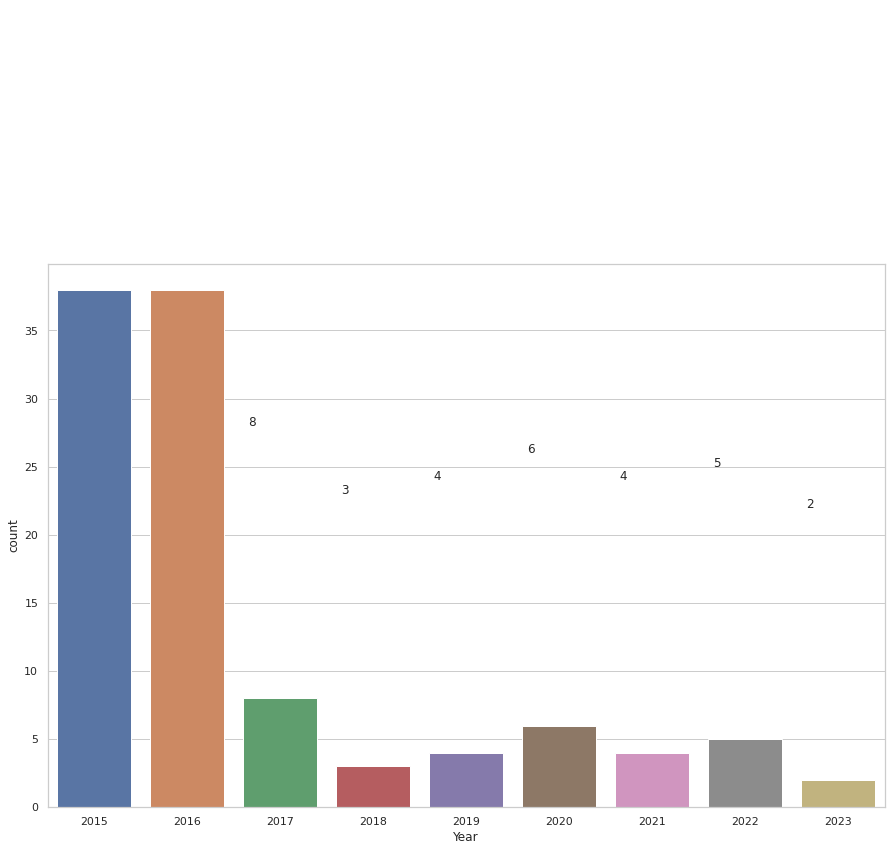

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Year'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


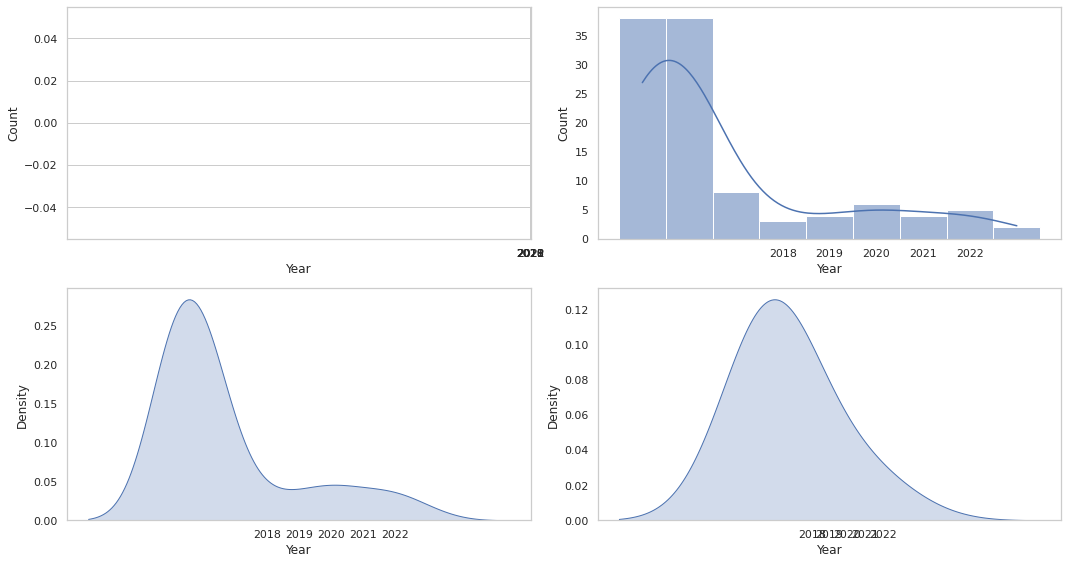

In [ ]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Year.value_counts())
ax.set_xlabel("Year")
ax.set_ylabel('Count')
plt.xticks(np.arange(2018,2023,1))

plt.subplot(222)
sns.histplot(x=tweets.Year,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Year,fill=True)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Year,fill=True,bw_adjust=3)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.tight_layout()
plt.show()

Visualizing Count By Month

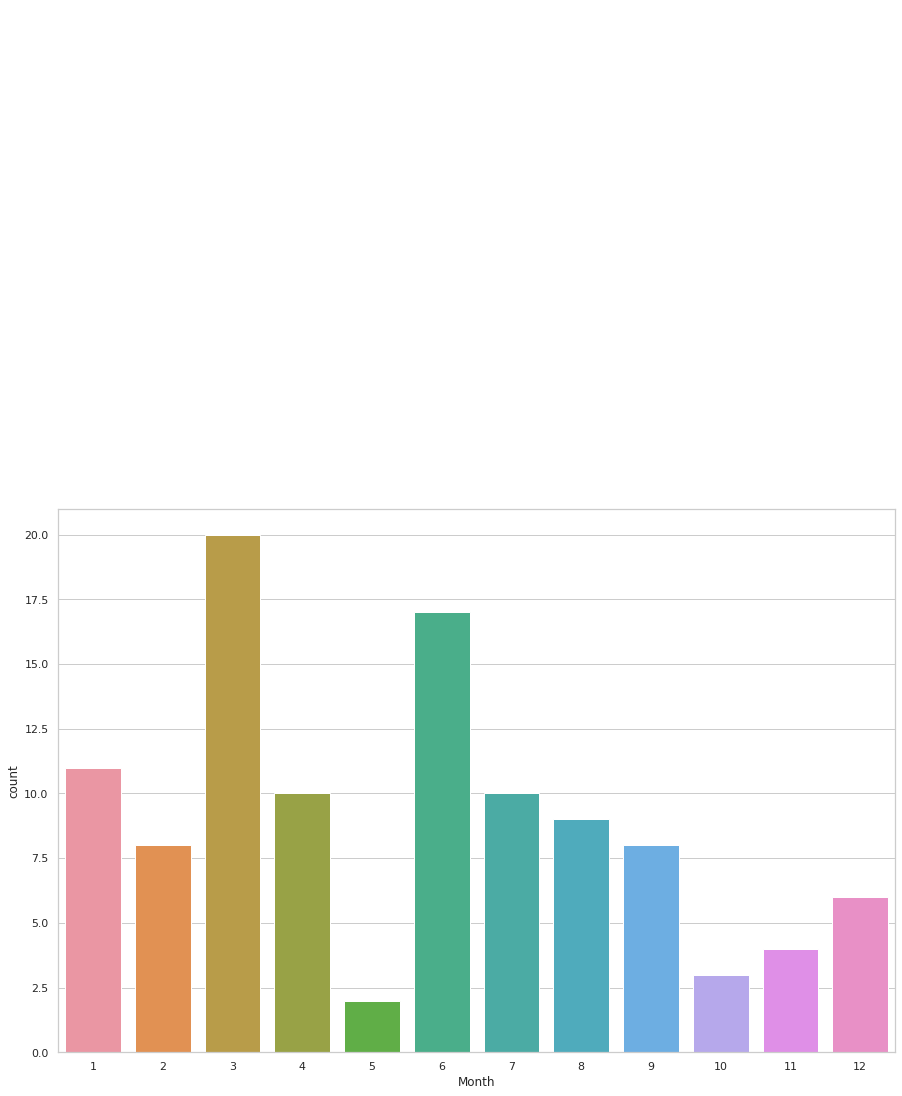

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Month'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


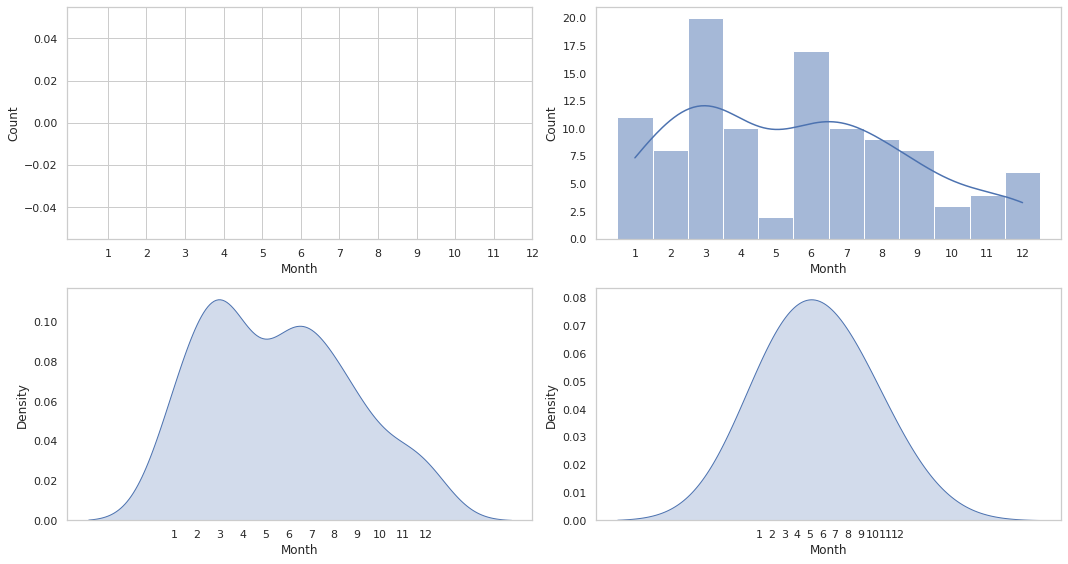

In [ ]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Month.value_counts())
ax.set_xlabel("Month")
ax.set_ylabel('Count')
plt.xticks(np.arange(1,13,1))

plt.subplot(222)
sns.histplot(x=tweets.Month,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Month,fill=True)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Month,fill=True,bw_adjust=3)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.tight_layout()
plt.show()

Visualizing Count By Week

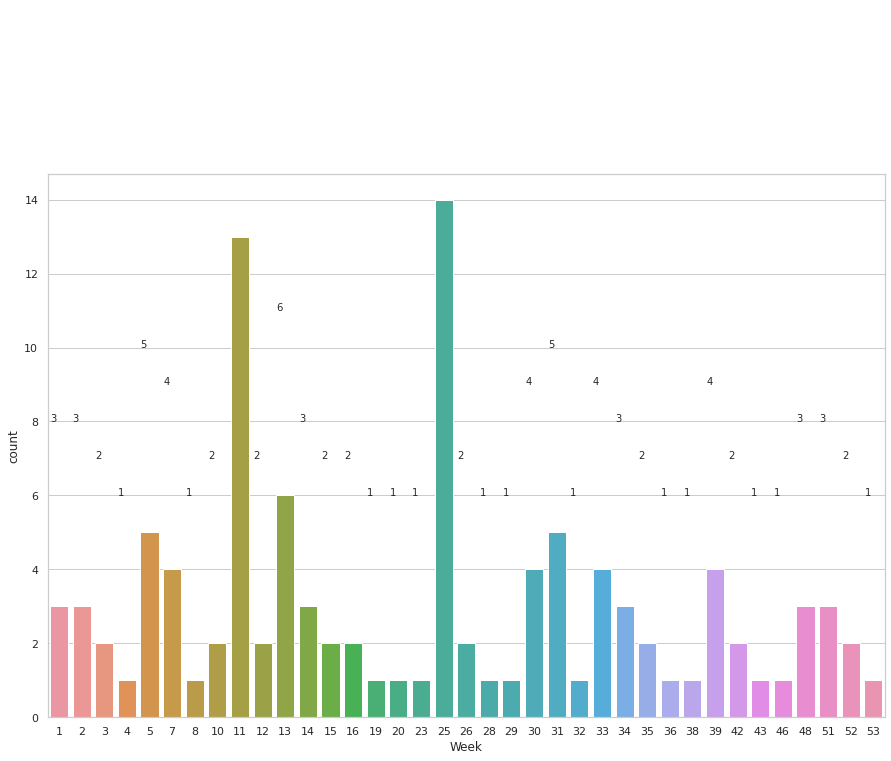

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Week'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.005, p.get_height()+5), fontsize = 10)

In [ ]:
%

try:
    st.download_button(label='Download results', data=convert_df(data), file_name = f'{file_name}.csv', mime='text/csv')
except:
    pass

                 

Overwriting app.py
